# Librerías

In [1]:
!pip install adversarial-robustness-toolbox

Defaulting to user installation because normal site-packages is not writeable


In [2]:

import tensorflow as tf
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


2025-02-12 14:40:48.627614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-12 14:40:48.646548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-12 14:40:48.652978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-12 14:40:48.666841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-12 14:40:50.396758: W tensorflow/compiler/tf2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

/home/c7032681/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Cargar datos

In [4]:
def LeerDataset():
    data = pd.read_csv("./out-010125.csv", encoding="utf-8", na_values="?", low_memory=False, on_bad_lines='skip')
    data_cleaned = data.fillna(0)
    data=data_cleaned
    return data

In [5]:

# pd.set_option('future.no_silent_downcasting', True)
dataset = LeerDataset()
#data.head()


In [6]:
from sklearn.model_selection import train_test_split
def CargarYprepararDatos(data):
    #data['Pre_static_analysis.Filename'] = data['Pre_static_analysis.Filename'].str.split('.').str[0]
    test = data.apply(pd.to_numeric, errors='coerce')
    data = test
    X = data.drop("malware", axis=1)
    y = data["malware"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
    return X_train, X_test, y_train, y_test


In [7]:
X_train, X_test, y_train, y_test = CargarYprepararDatos(dataset)

In [8]:
import numpy as np

# Verificar el balance de clases en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))
print("Distribución de clases en y_train:", train_distribution)

# Verificar el balance de clases en el conjunto de prueba
unique, counts = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique, counts))
print("Distribución de clases en y_test:", test_distribution)

# Porcentaje de cada clase en y_train
total_train = len(y_train)
for label, count in train_distribution.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train) * 100:.2f}%)")

# Porcentaje de cada clase en y_test
total_test = len(y_test)
for label, count in test_distribution.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_test) * 100:.2f}%)")


Distribución de clases en y_train: {0: 173, 1: 139}
Distribución de clases en y_test: {0: 85, 1: 49}
Clase 0: 173 ejemplos (55.45%)
Clase 1: 139 ejemplos (44.55%)
Clase 0: 85 ejemplos (63.43%)
Clase 1: 49 ejemplos (36.57%)


In [9]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")


Distribución de clases después de SMOTE: {0: 173, 1: 173}
Clase 0: 173 ejemplos (50.00%)
Clase 1: 173 ejemplos (50.00%)


In [11]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")


Distribución de clases después de SMOTE: {0: 173, 1: 173}
Clase 0: 173 ejemplos (50.00%)
Clase 1: 173 ejemplos (50.00%)


In [12]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)  # auto balancea la clase minoritaria

# Generar muestras sintéticas y obtener las nuevas variables
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases después de SMOTE
unique, counts = np.unique(y_train_res, return_counts=True)
train_distribution_res = dict(zip(unique, counts))
print("Distribución de clases después de SMOTE:", train_distribution_res)

# Verificar la proporción de clases después de la re-muestreo
total_train_res = len(y_train_res)
for label, count in train_distribution_res.items():
    print(f"Clase {label}: {count} ejemplos ({(count / total_train_res) * 100:.2f}%)")

# Actualizar las variables X_train y y_train con los datos balanceados
X_train = X_train_res
y_train = y_train_res

# Ahora, X_train y y_train contienen las muestras balanceadas con SMOTE


Distribución de clases después de SMOTE: {0: 173, 1: 173}
Clase 0: 173 ejemplos (50.00%)
Clase 1: 173 ejemplos (50.00%)


# Convertir a numpy

In [13]:
#X_train
import pandas as pd
import numpy as np
np_X_train = X_train.to_numpy()
np_X_test = X_test.to_numpy()
np_y_train = y_train.to_numpy()
np_y_test = y_test.to_numpy()

In [14]:
# Prueba - To_categorical => https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical => Cambia la forma en la que entran los datos, se rompe en modelo
# X_train = to_categorical(X_train, 2)
# X_test = to_categorical(X_test, 2)
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
print(len(np_X_train))

346


In [15]:
print(type(np_y_test))
print(X_train.shape[1])

<class 'numpy.ndarray'>
10221


# Modelo

Accuracy en entrenamiento: 0.97
Accuracy en prueba: 0.94

Reporte de clasificación en prueba:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        85
           1       1.00      0.84      0.91        49

    accuracy                           0.94       134
   macro avg       0.96      0.92      0.93       134
weighted avg       0.95      0.94      0.94       134



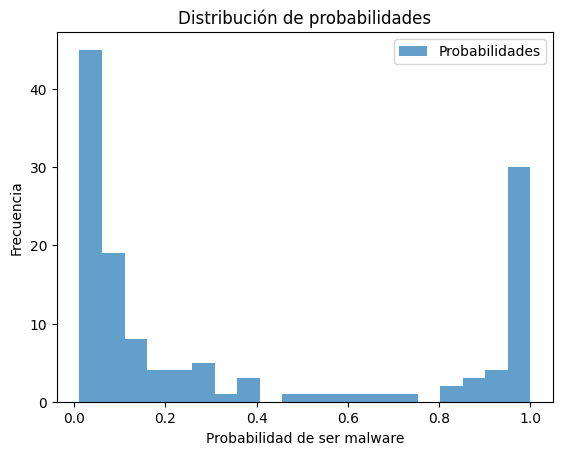

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Crear el modelo SVM con kernel RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Entrenar el modelo SVM
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en entrenamiento: {train_accuracy:.2f}")

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en prueba: {test_accuracy:.2f}")

# Generar un reporte detallado
print("\nReporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

# Visualizar las probabilidades (si el modelo lo permite)
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(X_test)[:, 1]
    plt.hist(probs, bins=20, alpha=0.7, label='Probabilidades')
    plt.xlabel('Probabilidad de ser malware')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de probabilidades')
    plt.legend()
    plt.show()


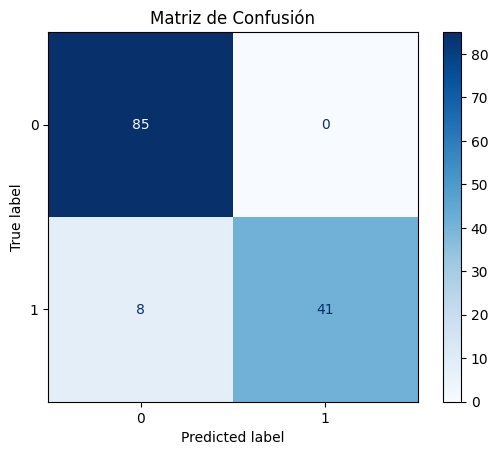

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


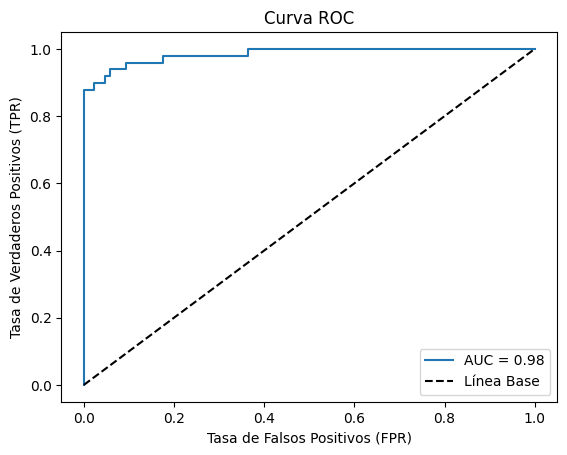

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades y la curva ROC
if hasattr(model, "predict_proba"):
    y_probs = model.predict_proba(X_test)[:, 1]
else:
    # Estimación de probabilidades con `decision_function` si no hay `predict_proba`
    y_probs = model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Línea Base")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


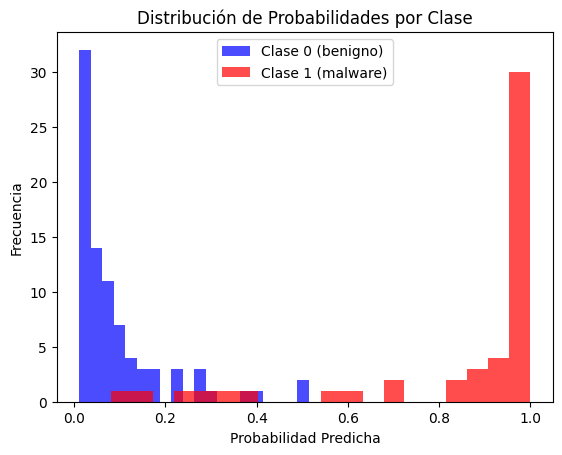

In [19]:
# Graficar las probabilidades para cada clase
plt.hist(y_probs[y_test == 0], bins=20, alpha=0.7, label='Clase 0 (benigno)', color='blue')
plt.hist(y_probs[y_test == 1], bins=20, alpha=0.7, label='Clase 1 (malware)', color='red')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades por Clase')
plt.legend()
plt.show()


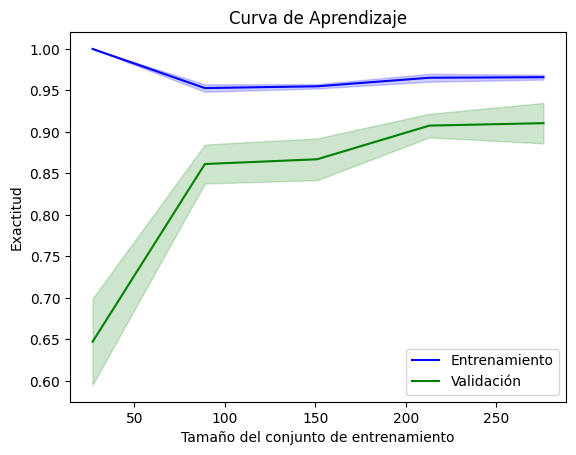

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular promedios y desviaciones
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validación', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Exactitud')
plt.title('Curva de Aprendizaje')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Predecir las etiquetas para los datos de prueba
y_pred_probs = model.predict(np_X_test)  # Obtiene las probabilidades de salida
y_pred = (y_pred_probs > 0.5).astype(int)  # Convierte probabilidades a etiquetas binarias (0 o 1)

# Asegurarse de que las etiquetas verdaderas estén en el formato adecuado
try:
    y_true = np.argmax(np_y_test, axis=1)  # Si es one-hot encoded
except:
    y_true = np_y_test  # Si ya es un array unidimensional

# Calcular métricas
precision = precision_score(y_true, y_pred, average="binary")
recall = recall_score(y_true, y_pred, average="binary")
f1 = f1_score(y_true, y_pred, average="binary")
accuracy = accuracy_score(y_true, y_pred)

# Imprimir resultados
print(f"Métricas en los datos de prueba:")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Métricas en los datos de prueba:
Precisión: 1.00
Recall: 0.84
F1-score: 0.91
Exactitud (Accuracy): 0.94


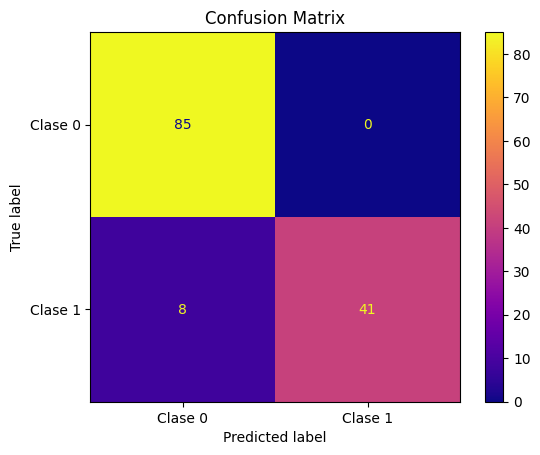

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Clase 0", "Clase 1"], cmap="plasma")
plt.title("Confusion Matrix")
plt.show()


# Ataque 1 = Generar muestras adversarias con FGSM

In [23]:
print(len(np_X_test))
print(len(np_X_test)/10)

134
13.4


In [24]:
from art.estimators.classification import SklearnClassifier
from sklearn.svm import SVC
art_classifier = SklearnClassifier(model=model)

In [25]:
from art.attacks.evasion import FastGradientMethod
import numpy as np

# Configura FGSM con el clasificador
epsilon = 0.3  # Magnitud de la perturbación
fgsm_attack = FastGradientMethod(estimator=art_classifier, eps=epsilon)

# Genera ejemplos adversarios para X_test
X_test_adv = fgsm_attack.generate(x=np_X_test)

/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
# Predicciones con ejemplos adversarios
y_test_pred_adv = art_classifier.predict(X_test_adv)

# Calcular la precisión después del ataque
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, np.argmax(y_test_pred_adv, axis=1))
print(f"Precisión en datos adversarios: {accuracy:.2f}")


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión en datos adversarios: 0.18


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión en datos originales: 0.95
Loss en datos originales: 0.16
Precisión en datos adversarios: 0.18
Loss en datos adversarios: 1.40


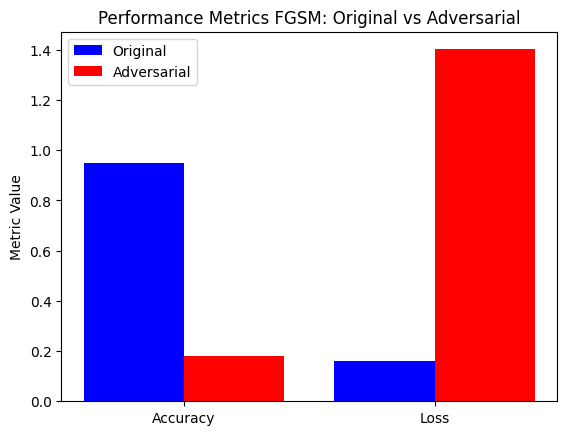

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss

# Predicciones en datos originales
y_test_pred = art_classifier.predict(X_test)
accuracy_original = accuracy_score(y_test, np.argmax(y_test_pred, axis=1))
loss_original = log_loss(y_test, y_test_pred)

# Predicciones en datos adversarios
y_test_pred_adv = art_classifier.predict(X_test_adv)
accuracy_adversarial = accuracy_score(y_test, np.argmax(y_test_pred_adv, axis=1))
loss_adversarial = log_loss(y_test, y_test_pred_adv)

print(f"Precisión en datos originales: {accuracy_original:.2f}")
print(f"Loss en datos originales: {loss_original:.2f}")
print(f"Precisión en datos adversarios: {accuracy_adversarial:.2f}")
print(f"Loss en datos adversarios: {loss_adversarial:.2f}")

# Datos para graficar
metrics = ['Accuracy', 'Loss']
original_values = [accuracy_original, loss_original]
adversarial_values = [accuracy_adversarial, loss_adversarial]

# Crear una gráfica de barras
x = range(len(metrics))
width = 0.4

plt.bar([p - width/2 for p in x], original_values, width, label='Original', color='blue')
plt.bar([p + width/2 for p in x], adversarial_values, width, label='Adversarial', color='red')

# Configuración de la gráfica
plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Performance Metrics FGSM: Original vs Adversarial')
plt.legend()
plt.show()


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión (Precision): 0.09
Sensibilidad (Recall): 0.14
Puntaje F1 (F1-Score): 0.11
Exactitud (Accuracy): 0.18


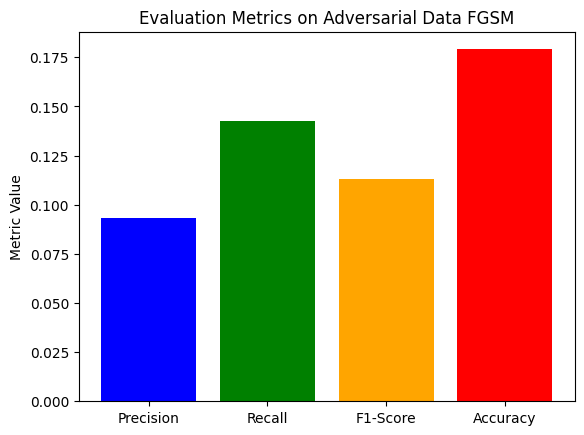

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predicciones en datos adversarios
y_test_pred_adv = art_classifier.predict(X_test_adv)

# Convertir probabilidades a clases binarias
y_test_pred_adv_classes = np.argmax(y_test_pred_adv, axis=1)

# Calcular métricas
precision = precision_score(y_test, y_test_pred_adv_classes)
recall = recall_score(y_test, y_test_pred_adv_classes)
f1 = f1_score(y_test, y_test_pred_adv_classes)
accuracy = accuracy_score(y_test, y_test_pred_adv_classes)

# Mostrar resultados
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Puntaje F1 (F1-Score): {f1:.2f}")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
import matplotlib.pyplot as plt

# Datos para la gráfica
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

# Crear gráfica de barras
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
#plt.ylim(0, 1)  # Escalar entre 0 y 1
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics on Adversarial Data FGSM')
plt.show()


# Ataque 2 - BasicIterativeMethod

In [29]:
from art.attacks.evasion import BasicIterativeMethod

# Configuración del ataque BIM
epsilon = 0.4  # Magnitud máxima de la perturbación
eps_step = 0.05  # Paso en cada iteración
max_iter = 2  # Número de iteraciones

bim_attack = BasicIterativeMethod(estimator=art_classifier, eps=epsilon, eps_step=eps_step, max_iter=max_iter)

# Generar ejemplos adversarios usando BIM
X_test_adv_bim = bim_attack.generate(x=np_X_test)


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
PGD - Random Initializations: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predicciones en datos adversarios BIM
y_test_pred_bim = art_classifier.predict(X_test_adv_bim)
y_test_pred_bim_classes = np.argmax(y_test_pred_bim, axis=1)

# Calcular métricas
precision_bim = precision_score(y_test, y_test_pred_bim_classes)
recall_bim = recall_score(y_test, y_test_pred_bim_classes)
f1_bim = f1_score(y_test, y_test_pred_bim_classes)
accuracy_bim = accuracy_score(y_test, y_test_pred_bim_classes)

# Mostrar resultados
print(f"Precisión (Precision): {precision_bim:.2f}")
print(f"Sensibilidad (Recall): {recall_bim:.2f}")
print(f"Puntaje F1 (F1-Score): {f1_bim:.2f}")
print(f"Exactitud (Accuracy): {accuracy_bim:.2f}")


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión (Precision): 0.71
Sensibilidad (Recall): 0.90
Puntaje F1 (F1-Score): 0.79
Exactitud (Accuracy): 0.83


# Ataque 3 - ProjectedGradientDescent

In [31]:
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import SklearnClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear un clasificador ART para el modelo SVM
art_classifier = SklearnClassifier(model=model)

# Configurar el ataque PGD
pgd = ProjectedGradientDescent(
    estimator=art_classifier,   # Norm L2, puedes usar 'inf' para la norma L∞
    eps=0.9,  # Tamaño máximo de perturbación
    eps_step=0.1,  # Tamaño del paso
    max_iter=2,  # Máximo número de iteraciones
    batch_size=32,
    targeted=False,  # Ataque no dirigido
    verbose=True
)

# Generar ejemplos adversarios con PGD
X_test_adv = pgd.generate(x=np_X_test)

# Evaluar el modelo en los datos adversarios
y_pred_adv = model.predict(X_test_adv)
y_pred_adv = (y_pred_adv > 0.5).astype(int)  # Convertir las predicciones a 0 o 1 para métricas

# Calcular la precisión en los ejemplos adversarios
accuracy_adv = accuracy_score(np_y_test, y_pred_adv)
print(f"Precisión en datos adversarios (PGD): {accuracy_adv:.4f}")

# Mostrar un informe de clasificación
print("\nInforme de clasificación en datos adversarios (PGD):")
print(classification_report(np_y_test, y_pred_adv))


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
PGD - Random Initializations: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión en datos adversarios (PGD): 0.3881

Informe de clasificación en datos adversarios (PGD):
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        85
           1       0.23      0.29      0.25        49

    accuracy                           0.39       134
   macro avg       0.38      0.37      0.37       134
weighted avg       0.41      0.39      0.40       134



In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Calcular las métricas
precision = precision_score(np_y_test, y_pred_adv)
recall = recall_score(np_y_test, y_pred_adv)
f1 = f1_score(np_y_test, y_pred_adv)
accuracy = accuracy_score(np_y_test, y_pred_adv)

# Mostrar los resultados
print("Métricas en ejemplos adversarios (PGD):")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1-Score): {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")


Métricas en ejemplos adversarios (PGD):
Precisión (Precision): 0.2295
Sensibilidad (Recall): 0.2857
Puntaje F1 (F1-Score): 0.2545
Exactitud (Accuracy): 0.3881


In [33]:
#from art.attacks.evasion import SaliencyMapMethod # Da un error: InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

# Ataque 4 - ZOO - Error: Casting

In [28]:
from art.attacks.evasion import ZooAttack
from art.estimators.classification import SklearnClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear un clasificador ART para el modelo SVM
art_classifier = SklearnClassifier(model=model)

zoo = ZooAttack(
    classifier=art_classifier,
    confidence=0.0,  # Mayor confianza
    targeted=False,  # Ataque dirigido
    learning_rate=0.01,  # Mayor tasa de aprendizaje
    max_iter=5,  # Más iteraciones
    binary_search_steps=2,  # Más pasos de búsqueda binaria
    initial_const=0.01,  # Constante inicial más baja
    abort_early=False,  # No terminar temprano
    #use_resize=True,  # Activar redimensionamiento
    #use_importance=True,  # Activar selección de características
    verbose=False  # Imprimir progreso
)

In [29]:

np_X_test_zoo= np_X_test.astype('float64')
# Generar ejemplos adversarios con ZOO
X_test_adv = zoo.generate(x=np_X_test_zoo)



/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature 

In [30]:

# Evaluar el modelo en los datos adversarios
y_pred_adv = model.predict(X_test_adv)
y_pred_adv = (y_pred_adv > 0.5).astype(int)  # Convertir predicciones a 0 o 1

# Calcular precisión en datos adversarios
accuracy_adv = accuracy_score(np_y_test, y_pred_adv)
print(f"Precisión en datos adversarios (ZOO): {accuracy_adv:.4f}")

# Informe de clasificación
print("\nInforme de clasificación en datos adversarios (ZOO):")
print(classification_report(np_y_test, y_pred_adv))

/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Precisión en datos adversarios (ZOO): 0.9403

Informe de clasificación en datos adversarios (ZOO):
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        85
           1       1.00      0.84      0.91        49

    accuracy                           0.94       134
   macro avg       0.96      0.92      0.93       134
weighted avg       0.95      0.94      0.94       134



In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calcular las métricas
precision = precision_score(np_y_test, y_pred_adv)
recall = recall_score(np_y_test, y_pred_adv)
f1 = f1_score(np_y_test, y_pred_adv)
accuracy = accuracy_score(np_y_test, y_pred_adv)

# Mostrar los resultados
print("\nMétricas en ejemplos adversarios (ZOO):")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1-Score): {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")



Métricas en ejemplos adversarios (ZOO):
Precisión (Precision): 1.0000
Sensibilidad (Recall): 0.8367
Puntaje F1 (F1-Score): 0.9111
Exactitud (Accuracy): 0.9403


# Ataque 5 - DeepFool

In [32]:
from art.attacks.evasion import DeepFool
from art.estimators.classification import SklearnClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np

# Crear un clasificador ART a partir del modelo SVM
art_classifier = SklearnClassifier(model=model)

# Configurar el ataque DeepFool
deepfool = DeepFool(classifier=art_classifier, max_iter=20, epsilon=1e-6, nb_grads=10, verbose=True)

# Generar ejemplos adversarios con DeepFool
X_test_adv = deepfool.generate(x=np_X_test)

# Evaluar el modelo en los datos adversarios
y_pred_adv = model.predict(X_test_adv)
y_pred_adv = (y_pred_adv > 0.5).astype(int)  # Convertir predicciones a 0 o 1 si es binario

# Calcular precisión en datos adversarios
accuracy_adv = accuracy_score(y_test, y_pred_adv)
print(f"Precisión en datos adversarios (DeepFool): {accuracy_adv:.4f}")

# Informe de clasificación
print("\nInforme de clasificación en datos adversarios (DeepFool):")
print(classification_report(y_test, y_pred_adv))

# Calcular métricas adicionales
precision = precision_score(y_test, y_pred_adv)
recall = recall_score(y_test, y_pred_adv)
f1 = f1_score(y_test, y_pred_adv)
accuracy = accuracy_score(y_test, y_pred_adv)


/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
DeepFool:   0%|                                                                                                                                                   | 0/134 [00:00<?, ?it/s]/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid

Precisión en datos adversarios (DeepFool): 0.6343

Informe de clasificación en datos adversarios (DeepFool):
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        85
           1       0.00      0.00      0.00        49

    accuracy                           0.63       134
   macro avg       0.32      0.50      0.39       134
weighted avg       0.40      0.63      0.49       134



/home/c7032681/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/c7032681/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/c7032681/.

In [33]:

# Mostrar métricas adicionales
print("\nMétricas en ejemplos adversarios (DeepFool):")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1-Score): {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")



Métricas en ejemplos adversarios (DeepFool):
Precisión (Precision): 0.0000
Sensibilidad (Recall): 0.0000
Puntaje F1 (F1-Score): 0.0000
Exactitud (Accuracy): 0.6343


# Ataque 6 - CarliniL2Method

In [34]:
from art.attacks.evasion import CarliniL2Method

In [35]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier6 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[56:91]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions6 = np.argmax(classifier6.predict(np_X_test[56:91]), axis=1)


accuracy6 = np.sum(predictions6 == np.argmax(np_y_test[56:91])) / len(np_y_test[56:91])
print(f"Precisión en datos de prueba: {accuracy6 * 100:.2f}%")

attack6 = CarliniL2Method(classifier=classifier6)
x_test_adv6 = attack6.generate(x=np_X_test[56:91])
df_x_test_adv6 = pd.DataFrame(x_test_adv6)


2025-02-12 16:27:56.530883: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


TypeError: 'SVC' object is not callable

In [ ]:
array_zeros = np.zeros(len(np_X_test[56:91]), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test6 = model.evaluate(x_test_adv6, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test6, color=["blue", "green"])
plt.title("Evaluación en datos de prueba CarliniL2Method")
plt.show()

# Ataque 7 - CarliniLInfMethod

In [ ]:
from art.attacks.evasion import CarliniLInfMethod

In [ ]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier7 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[90:125]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions7 = np.argmax(classifier7.predict(np_X_test[90:125]), axis=1)


accuracy7 = np.sum(predictions7 == np.argmax(np_y_test[90:125])) / len(np_y_test[90:125])
print(f"Precisión en datos de prueba: {accuracy7 * 100:.2f}%")

attack7 = CarliniLInfMethod(classifier=classifier7)
x_test_adv7 = attack7.generate(x=np_X_test[90:125])
df_x_test_adv7 = pd.DataFrame(x_test_adv7)


In [ ]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test7 = model.evaluate(x_test_adv7, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test7, color=["blue", "green"])
plt.title("Evaluación en datos de prueba CarliniLInfMethod")
plt.show()

# Ataque 8 - BoundaryAttack

In [ ]:
from art.attacks.evasion import BoundaryAttack

In [ ]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier8 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions8 = np.argmax(classifier8.predict(np_X_test[10:45]), axis=1)


accuracy8 = np.sum(predictions8 == np.argmax(np_y_test[10:45])) / len(np_y_test[10:45])
print(f"Precisión en datos de prueba: {accuracy8 * 100:.2f}%")

attack8 = BoundaryAttack(estimator=classifier8)
x_test_adv8 = attack8.generate(x=np_X_test[10:45], y=array_zeros)
df_x_test_adv8 = pd.DataFrame(x_test_adv8)


In [ ]:
array_zeros = np.zeros(len(np_X_test[10:45]), dtype=int)

# Evaluar el modelo y graficar la pérdida y precisión
history_test8 = model.evaluate(x_test_adv8, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test8, color=["blue", "green"])
plt.title("Evaluación en datos de prueba BoundaryAttack")
plt.show()

# Ataque 9 - HopSkipJump

In [ ]:
# from art.attacks.evasion import AdversarialPatch # Error: TypeError: object of type 'int' has no len()
# from art.attacks.evasion import DecisionTreeAttack # EstimatorError: DecisionTreeAttack requires an estimator derived from <class 'art.estimators.classification.scikitlearn.ScikitlearnDecisionTreeClassifier'>
from art.attacks.evasion import HopSkipJump

In [ ]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier9 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_X_test[43:78]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions9 = np.argmax(classifier9.predict(np_X_test[43:78]), axis=1)


accuracy9 = np.sum(predictions8 == np.argmax(np_y_test[43:78])) / len(np_y_test[43:78])
print(f"Precisión en datos de prueba: {accuracy9 * 100:.2f}%")

attack9 = HopSkipJump(classifier=classifier9)
array_zeros = np.zeros(len(np_X_test[43:78]), dtype=int)

x_test_adv9 = attack9.generate(x=np_X_test[43:78], y=array_zeros)
df_x_test_adv9 = pd.DataFrame(x_test_adv9)


In [ ]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test9 = model.evaluate(x_test_adv9, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test9, color=["blue", "green"])
plt.title("Evaluación en datos de prueba HopSkipJump")
plt.show()

# Ataque 10 - SaliencyMapMethod

In [ ]:
from art.attacks.evasion import SaliencyMapMethod

In [ ]:
# Crear un clasificador ART a partir del modelo de TensorFlow
classifier10 = TensorFlowV2Classifier(
    model=model,
    input_shape=len(np_y_test[60:97]),
    clip_values=(0, 1),
    nb_classes=2,
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Evaluar el modelo en los datos de prueba limpios
predictions10 = np.argmax(classifier10.predict(np_X_test[60:97]), axis=1)

accuracy10 = np.sum(predictions10 == np.argmax(np_y_test[60:97])) / len(np_y_test[60:97])
print(f"Precisión en datos de prueba: {accuracy10 * 100:.2f}%")

In [ ]:
array_zeros = np.zeros(len(np_X_test[60:97]), dtype=int)

attack10 = SaliencyMapMethod(classifier=classifier10, theta=0.1, gamma=0.9, batch_size=1)
x_test_adv10 = attack10.generate(x=np_X_test[60:97], y=array_zeros)
df_x_test_adv10 = pd.DataFrame(x_test_adv10)


In [ ]:


# Evaluar el modelo y graficar la pérdida y precisión
history_test10 = model.evaluate(x_test_adv10, array_zeros, verbose=True)

# Graficar la pérdida y precisión
plt.figure(figsize=(10, 5))
plt.bar(["Loss", "Accuracy"], history_test10, color=["blue", "green"])
plt.title("Evaluación en datos de prueba SaliencyMapMethod")
plt.show()

# Curvas ROC



## FGSM


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

# Obtener las probabilidades predichas por el modelo para los datos adversarios
y_pred_prob = classifier.predict(x_test_adv)  # Predicciones en formato de probabilidad

# Convertir etiquetas de prueba a formato categórico si no lo están
if len(np_y_test.shape) == 1:
    y_test_categorical = to_categorical(np_y_test[0:35], num_classes=2)
else:
    y_test_categorical = np_y_test[0:35]

# Confirmar dimensionalidad
print("Forma de y_test_categorical:", y_test_categorical.shape)
print("Forma de y_pred_prob:", y_pred_prob.shape)

# Calcular FPR y TPR para la clase positiva
if len(y_pred_prob.shape) == 1 or y_pred_prob.shape[1] == 1:
    fpr, tpr, _ = roc_curve(y_test_categorical.ravel(), y_pred_prob.ravel())
else:
    fpr, tpr, _ = roc_curve(y_test_categorical[:, 1], y_pred_prob[:, 1])  # Para clase positiva

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC en datos adversarios', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## BasicIterativeMethod

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluar el modelo en los datos adversarios
predictions_adv2 = np.argmax(classifier2.predict(x_test_adv2), axis=1)

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob2 = classifier2.predict(x_test_adv2)[:, 1]  # Asumiendo que la segunda columna es la probabilidad de la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr2, tpr2, thresholds2 = roc_curve(np_y_test[35:70], y_pred_prob2)

# Calcular el AUC
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque BasicIterativeMethod', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Project Gradient Descent

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluar el modelo en los datos adversarios
predictions_adv3 = np.argmax(classifier3.predict(x_test_adv3), axis=1)

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob3 = classifier3.predict(x_test_adv3)[:, 1]  # Asumiendo que la segunda columna es la probabilidad de la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr3, tpr3, thresholds3 = roc_curve(np_y_test[70:105], y_pred_prob3)

# Calcular el AUC
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque ProjectedGradientDescent', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## ZOO

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob5 = classifier5.predict(x_test_adv5)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob5 = y_pred_prob5[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr5, tpr5, thresholds5 = roc_curve(np_y_test[99:134], y_pred_prob5)

# Calcular el AUC
roc_auc5 = auc(fpr5, tpr5)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque ZOO', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Deepfool

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob4 = classifier4.predict(x_test_adv4)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob4 = y_pred_prob4[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr4, tpr4, thresholds4 = roc_curve(np_y_test, y_pred_prob4)

# Calcular el AUC
roc_auc4 = auc(fpr4, tpr4)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque DeepFool', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## CarliniL2Method

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob6 = classifier6.predict(x_test_adv6)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob6 = y_pred_prob6[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr6, tpr6, thresholds6 = roc_curve(np_y_test[56:91], y_pred_prob6)

# Calcular el AUC
roc_auc6 = auc(fpr6, tpr6)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr6, tpr6, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque CarliniL"Method', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## Carlini LInf Method

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre los datos adversarios generados
y_pred_prob7 = classifier7.predict(x_test_adv7)  # Predicciones del modelo en los datos adversarios

# Calcular las probabilidades predichas para la clase positiva
y_pred_prob7 = y_pred_prob7[:, 1]  # Asumiendo que la segunda columna contiene las probabilidades para la clase positiva

# Calcular FPR y TPR para la curva ROC
fpr7, tpr7, thresholds7 = roc_curve(np_y_test[56:91], y_pred_prob7)

# Calcular el AUC
roc_auc7 = auc(fpr7, tpr7)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr7, tpr7, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC del ataque CarliniLInfMethod', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# Guardar en un archivo

In [ ]:
print(type(dataset))

In [ ]:
dataset.columns[-1]

titulos_cols = dataset.columns.values.tolist()
#titulos_cols = dataset.columns.values.tolist()

print(len(titulos_cols))

In [ ]:


df_x_test_adv = pd.DataFrame(x_test_adv)
all_attacks = pd.concat([df_x_test_adv, df_x_test_adv2], ignore_index=True)

all_attacks = pd.concat([all_attacks, df_x_test_adv3], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv4], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv5], ignore_index=True)

all_attacks = pd.concat([all_attacks, df_x_test_adv6], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv7], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv8], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv9], ignore_index=True)
all_attacks = pd.concat([all_attacks, df_x_test_adv10], ignore_index=True)
# Guardar el DataFrame en un archivo CSV
all_attacks.to_csv("adversarial_data_v2.csv", index=False, header=False)

In [ ]:
all_attacks.columns = titulos_cols

In [ ]:
print(len(all_attacks))